In [54]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Convolution2D, Dense, MaxPooling2D, Flatten
# Mnist reader to read images from the gzip file present in the training dataset
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 28, 28, 1)

    return images, labels


In [ ]:
import argparse
 
 
# Initialize parser
parser = argparse.ArgumentParser()
 
# Adding optional argument
parser.add_argument("-t", "--train", help = "Pass the training dataset location")
parser.add_argument("-ts", "--test", help = "Pass the testing dataset location")
# Read arguments from command line
args = parser.parse_args()


In [2]:
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [3]:
# Training and testing set splitting and using of data

X_train, y_train = load_mnist(args.train, kind='train')
X_test, y_test = load_mnist(args.test, kind='t10k')
# Making the y_train and y_test to categorical values as they are ranging from 0 to 9
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# Normalizing the pixel values from 0 to 1 range only
X_train, X_test = prep_pixels(X_train, X_test)

In [4]:
y_train.shape

(60000, 10)

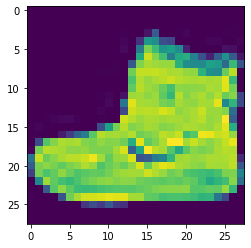

In [5]:
# Visualization of images
plt.imshow(X_train[0])

In [6]:
X_train.shape

(60000, 28, 28, 1)

In [7]:
X_test.shape

(10000, 28, 28, 1)

In [8]:
# Initializing the CNN
classifier = Sequential()
# Adding first Convolution layer adding 32 as feature detector
# With 3 * 3 as stride with the input shape as 28 * 28 and activation as relu to increase non linearity between data
classifier.add(Convolution2D(32, (3, 3), padding = "same", input_shape = (28 ,28, 1), activation = 'relu'))
# Adding second layer of maxpooling to extract the best features from the data with stride of 2*2
classifier.add(MaxPooling2D( pool_size = (2, 2)))
# Now then flatten all of the data to pass it to the ANN to classify the data
classifier.add(Flatten())
# Full connection by adding the Dense layer to the model by adding 128 nodes as an output to the first layer 
classifier.add(Dense(units = 128, activation = 'relu'))
# Adding the hidden layer to the model with output dimension as 10 as we can get 10 distinct set of values
classifier.add(Dense(units = 10, activation = 'softmax'))
# Now compiling the whole classifier which configures the whole model for training with loss as categorical crossentropy
# And using Stochastic Gradient Decent with learning rate as 0.01
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.01, momentum=0.9)
# classifier.compile(loss = "categorical_crossentropy", optimizer = opt)
classifier.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
# Now training our data set with batch size as 600 to train data individually and 
# epochs as 100 to train the data 100 times
# Validating the training on X_test and y_test for the trained data
# Steps per epoch will be running 100 batches per epoch
classifier.fit(
    x = X_train,
    y = y_train,
    batch_size = 600,
    epochs = 100,
    verbose = "auto",
    validation_data = (X_test, y_test),
    shuffle=True,
    initial_epoch=0,
    steps_per_epoch = 100,
    validation_steps= 100,
    validation_batch_size = 100,
    validation_freq=1,
    max_queue_size=10,
    workers = 2,
    use_multiprocessing = True,
)


Epoch 1/100
100/100 [==============================] - 7s 64ms/step - loss: 0.9896 - accuracy: 0.6655 - val_loss: 0.6927 - val_accuracy: 0.7257
Epoch 2/100
100/100 [==============================] - 6s 62ms/step - loss: 0.5224 - accuracy: 0.8142 - val_loss: 0.5054 - val_accuracy: 0.8227
Epoch 3/100
100/100 [==============================] - 6s 64ms/step - loss: 0.4645 - accuracy: 0.8352 - val_loss: 0.4712 - val_accuracy: 0.8311
Epoch 4/100
100/100 [==============================] - 6s 65ms/step - loss: 0.4350 - accuracy: 0.8474 - val_loss: 0.4439 - val_accuracy: 0.8440
Epoch 5/100
100/100 [==============================] - 6s 64ms/step - loss: 0.4136 - accuracy: 0.8546 - val_loss: 0.4158 - val_accuracy: 0.8551
Epoch 6/100
100/100 [==============================] - 7s 66ms/step - loss: 0.3906 - accuracy: 0.8636 - val_loss: 0.4107 - val_accuracy: 0.8568
Epoch 7/100
100/100 [==============================] - 7s 70ms/step - loss: 0.3772 - accuracy: 0.8683 - val_loss: 0.3958 - val_accuracy:

100/100 [==============================] - 7s 67ms/step - loss: 0.1570 - accuracy: 0.9448 - val_loss: 0.2529 - val_accuracy: 0.9120
Epoch 58/100
100/100 [==============================] - 7s 68ms/step - loss: 0.1548 - accuracy: 0.9450 - val_loss: 0.2591 - val_accuracy: 0.9090
Epoch 59/100
100/100 [==============================] - 7s 67ms/step - loss: 0.1533 - accuracy: 0.9466 - val_loss: 0.2531 - val_accuracy: 0.9137
Epoch 60/100
100/100 [==============================] - 7s 68ms/step - loss: 0.1482 - accuracy: 0.9476 - val_loss: 0.2595 - val_accuracy: 0.9106
Epoch 61/100
100/100 [==============================] - 7s 68ms/step - loss: 0.1497 - accuracy: 0.9466 - val_loss: 0.2682 - val_accuracy: 0.9076
Epoch 62/100
100/100 [==============================] - 7s 68ms/step - loss: 0.1458 - accuracy: 0.9485 - val_loss: 0.2544 - val_accuracy: 0.9124
Epoch 63/100
100/100 [==============================] - 7s 68ms/step - loss: 0.1398 - accuracy: 0.9516 - val_loss: 0.2538 - val_accuracy: 0.913

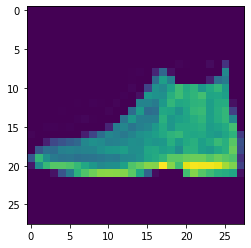

In [16]:
plt.imshow(X_test[0])

In [25]:
# Saving the model
classifier.save("/home/shashank/Desktop/vectorai/saved_model/fashion_mnist.h5")

In [26]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [51]:
#Testing the model out on real data
from keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
model = load_model("saved_model/fashion_mnist.h5")

def load_image_prediction(filename):
    img_dict = {
    0 : "T-shirt/top",
    1 : "Trouser",
    2 : "Pullover",
    3 : "Dress",
    4 : "Coat",
    5 : "Sandal",
    6 : "Shirt",
    7 : "Sneaker",
    8 : "Bag",
    9 : "Ankle boot"
    } 
    # load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    y_pred = model.predict(img)
    classes_x = np.argmax(y_pred, axis=1)
    class_pred = img_dict[classes_x[0]]
    return class_pred

pred = load_image_prediction("tests/sample_image.jpg")
print(pred)